In [1]:
library(GLMsData)
library(MASS)
data(sheep)

In [2]:
str(sheep)

'data.frame':	64 obs. of  2 variables:
 $ Weight: num  22.1 26.2 33.2 34.3 49 52.6 27.6 31 32.6 44.6 ...
 $ Energy: num  1.31 1.27 1.25 1.14 1.78 1.7 1.39 1.47 1.75 2.25 ...


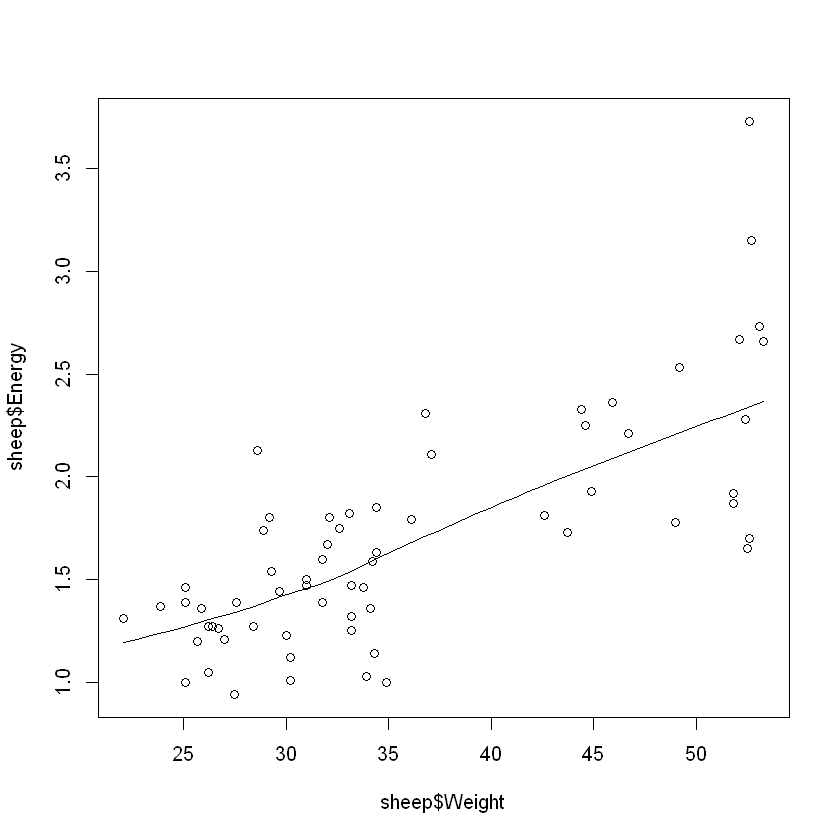

In [3]:
scatter.smooth(sheep$Energy ~ sheep$Weight)

In [4]:
lm.1 <- lm(Energy ~ Weight, data=sheep)

In [5]:
printCoefmat(coef(summary(lm.1)))

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 0.1329407  0.1804360  0.7368     0.464    
Weight      0.0434157  0.0048568  8.9393 9.447e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [21]:
extractAIC(lm.1)

[1]    2.0000 -126.6046

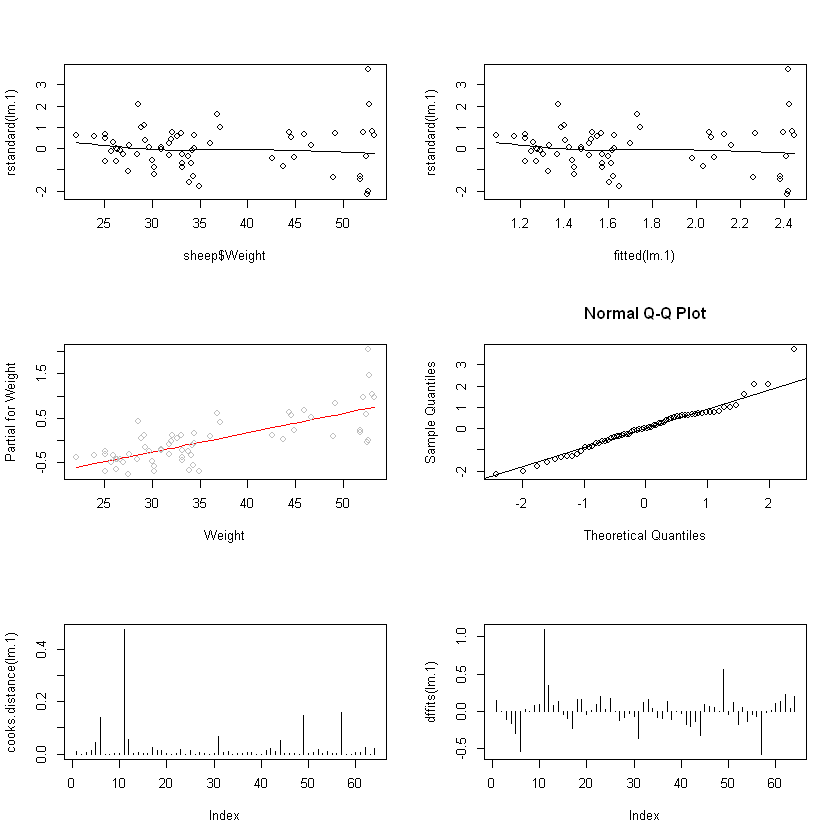

In [9]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.1) ~ sheep$Weight)
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="Weight")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")
plot(dffits(lm.1), type="h")

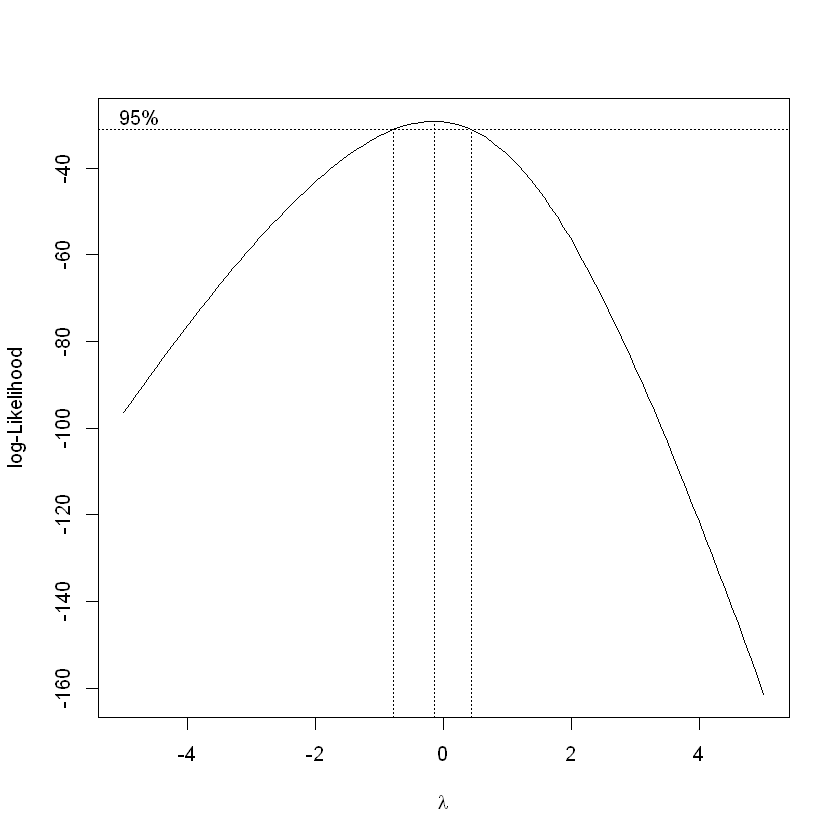

In [10]:
boxcox(Energy ~ Weight, lambda=seq(-5, 5, length=100), data=sheep)

In [11]:
lm.1.log <- update(lm.1, log(Energy) ~ .)

In [19]:
printCoefmat(coef(summary(lm.1.log)))

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.3662362  0.0989974 -3.6995 0.0004606 ***
Weight       0.0235623  0.0026647  8.8424 1.386e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


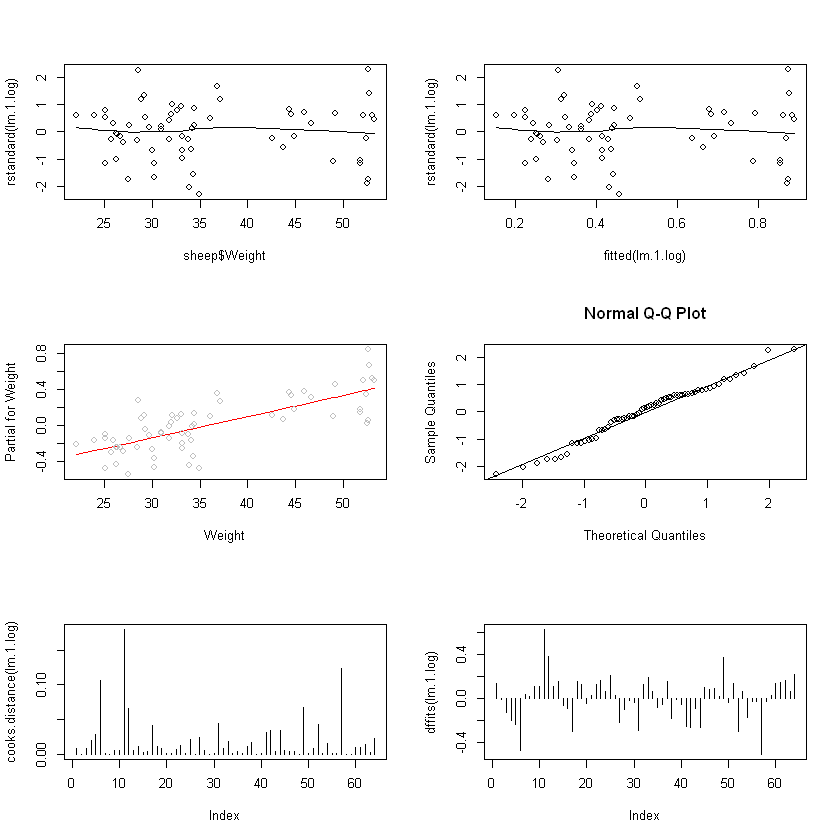

In [12]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.1.log) ~ sheep$Weight)
scatter.smooth(rstandard(lm.1.log) ~ fitted(lm.1.log))
termplot(lm.1.log, partial.resid = TRUE, terms="Weight")
qqnorm(rstandard(lm.1.log))
qqline(rstandard(lm.1.log))
plot(cooks.distance(lm.1.log), type="h")
plot(dffits(lm.1.log), type="h")

In [20]:
extractAIC(lm.1.log)

[1]    2.0000 -203.4407

In [16]:
outlier = which(rowSums(influence.measures(lm.1.log)$is.inf) > 0)

In [17]:
lm.1.log.rem.out <- lm(log(Energy) ~ Weight, data=sheep, subset = -outlier)

In [18]:
printCoefmat(coef(summary(lm.1.log.rem.out)))

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.3319439  0.0956920 -3.4689  0.001002 ** 
Weight       0.0223577  0.0026327  8.4922 1.053e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
